# PROJETO 01: Realce de imagens usando transformações de intensidade e equalização do histograma

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
lua = cv2.imread('drive/MyDrive/PDI/assets/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)
quadrado = cv2.imread('drive/MyDrive/PDI/assets/Fig0326(a)(embedded_square_noisy_512).tif', cv2.IMREAD_GRAYSCALE)

## Transformação logarítmica

In [3]:
def transformacao_logaritmica(imagem):
    """
    Aplica a transformação logarítmica a uma imagem em escala de cinza.

    Args:
        imagem (numpy.ndarray): Imagem de entrada em escala de cinza (valores de 0 a 255).

    Returns:
        numpy.ndarray: Imagem transformada.
    """
    imagem = imagem.astype(np.float32)

    c = 255 / np.log(1 + np.max(imagem))
    imagem_log = c * np.log(1 + imagem)

    return np.clip(imagem_log, 0, 255).astype(np.uint8)

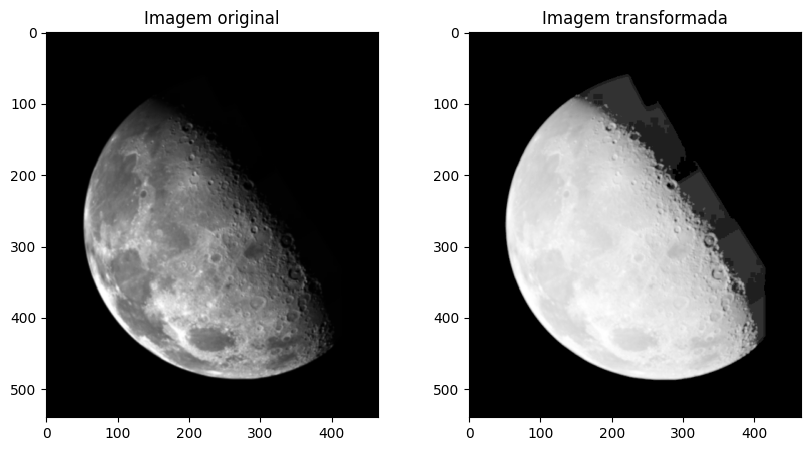

In [4]:
img_log = transformacao_logaritmica(lua)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(lua, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original')

plt.subplot(1, 2, 2)
plt.imshow(img_log, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem transformada')

plt.show()

## Transformação de potência

In [ ]:
def transformacao_potencia(imagem, gamma=0.5):
    """
    Aplica a transformação de potência a uma imagem em escala de cinza.

    Args:
        imagem (numpy.ndarray): Imagem de entrada em escala de cinza (valores de 0 a 255).
        c (int): Constante de escala.
        gamma (float): Expoente da transformação de potência.

    Returns:
        numpy.ndarray: Imagem transformada.
    """
    # Garantir que a imagem está em formato float para evitar overflow
    imagem = imagem.astype(np.float32)

    # Definir a constante de escala c
    c = 255 / np.max(imagem) ** gamma

    # Aplicar a transformação de potência
    imagem_potencia = c * (imagem ** gamma)

    # Converter para uint8 e retornar
    return np.clip(imagem_potencia, 0, 255).astype(np.uint8)

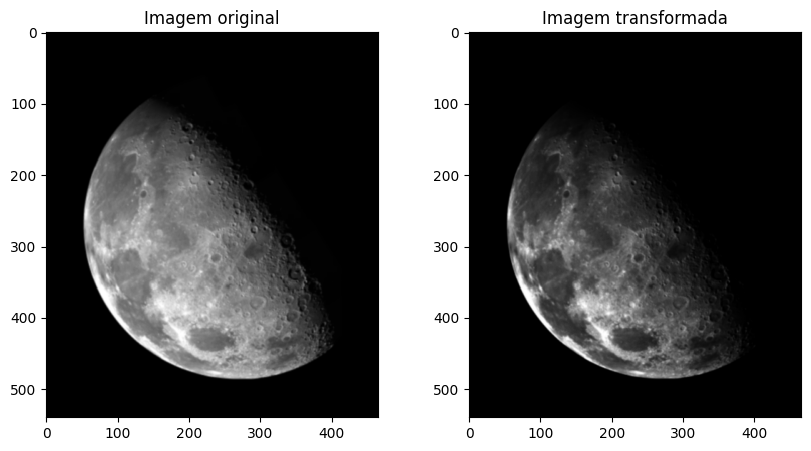

In [ ]:
img_potencia = transformacao_potencia(lua, gamma=2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(lua, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem original')

plt.subplot(1, 2, 2)
plt.imshow(img_potencia, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem transformada')

plt.show()

## Histograma de imagem

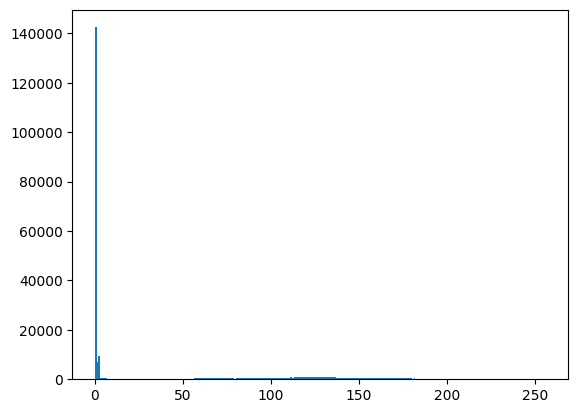

In [ ]:
plt.hist(lua.ravel(), 256, [0, 256])
plt.show()